In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
# import cv2
import pandas as pd
from PIL import Image, ImageFilter

import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras import backend as K
from keras.callbacks import TensorBoard

import tensorflow as tf

Using TensorFlow backend.


In [2]:
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend" #for GPU Support on MacBook
print(tf.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

1.13.1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17466346223561647265
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4945621811
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4808502537938237116
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
currentDir = os.getcwd()
datasetDir = currentDir + "\\FilteredImages\\"
# datasetDir = currentDir + "/FilteredImages2/" # NEW SINGLE IMAGES DIRECTORY
trainDir = os.path.join(datasetDir, "train")
testDir = os.path.join(datasetDir, "test")
validDir = os.path.join(datasetDir, "valid")
y_dataDir = os.path.join(datasetDir, "y_data")

In [5]:
def sortFirst(val):
    return val[0]

def getBinary(dataFile):
    listOfTraining = []
    trainingHeader = []
    with open(dataFile) as csvfile:
#     reader = csv.DictReader(csvfile)
        reader2 = csv.reader(csvfile)
        listOfTraining = list(reader2)
        trainingHeader = listOfTraining[0]
        listOfTraining.pop(0)
#         listOfTraining = listOfTraining.sort(key = sortFirst, reverse = False)
#         np.asarray(listofTraining, dtype=np.int32)
#         return np.asarray(listofTraining, dtype=np.int32)
    listOfTrainingBinary = []
    for item in listOfTraining:
        listOfTrainingBinary.append(item[1])
    return np.asarray(listOfTrainingBinary, dtype=np.int32)

In [6]:
y_train = []
y_trainDir = os.path.join(y_dataDir, 'train_split_Depression_AVEC2017-edited.csv')
# print(y_trainDir)
y_train = getBinary(y_trainDir)
y_testDir = os.path.join(y_dataDir, 'dev_split_Depression_AVEC2017.csv')
# print(y_testDir)
y_test = getBinary(y_testDir)
print(y_train)
print(y_test)

# Y_train = np.asarray(y_train, dtype=np.int32)

[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0]


In [7]:
x_trainDir = trainDir
x_testDir = testDir

In [8]:
x_trainDir

'C:\\Users\\tanho\\Downloads\\Aaron-Workspace\\FilteredImages\\train'

In [9]:
# testSet = []
# testFolders =[]
# # trainingSet = []
# trainingFolders = []
# x_train = []
# y_train = []

def getImagesDir(mainDirectory):
    ImgDict = {}
    ImgList = []
    
    for folder in os.listdir(mainDirectory):
        theDir = os.path.join(mainDirectory, folder)
        images = os.listdir(theDir)
        listOfImgDir = []
        for img in images:
#             listOfImgDir.append(Image.open(os.path.join(theDir, img)))
            listOfImgDir.append(os.path.join(theDir, img))
#         print(listOfImgDir)
#         print(images)
        folderName = folder.split('_')
        ImgDict[folderName[0]] = listOfImgDir
        ImgList.append(listOfImgDir)
    imgList = ImgList.sort(key = sortFirst, reverse = False)
    return ImgList
        
        
#         for img in images
    
# for folder in toProcessList:
#     images = os.listdir(datasetDir + "/" + folder)
#     folderName = folder.split('_')
# #     print(folderName[0])
#     if folderName[0] in listOfTrainingName:
#         trainingFolders.append(datasetDir + "/" + folder)
# #         print(folderName)
#         index = listOfTrainingName.index(folderName[0])
#         temp = listOfTraining[index]
#         x_train.append(images)
#         tempBList = []
#         val = temp[1]
#         tempBList.append(val)
#         y_train.append(tempBList)
#         #temp.append(images)
#         #trainingSet.append(temp)
#     else:
#         testFolders.append(datasetDir + "/" + folder)
#         testSet.append(images)

trainingImagesDir = getImagesDir(trainDir)
testImagesDir = getImagesDir(testDir)
# np.array(trainingImages).shape

In [10]:
def importImages(listOfImgDir):
    myFolder = []
    for folder in listOfImgDir:
        myImages = []
        for image in folder:
            myImages.append(np.array(Image.open(image)))
        myFolder.append(np.array(myImages))
    return myFolder


#First Array iterate through Folder, Second Array Iterate though Image in Folder
trainingImages = importImages(trainingImagesDir)
testImages = importImages(testImagesDir)

In [11]:
#Num of Img, Height, Width
print(len(trainingImages)) 

len(y_train)

107


107

In [12]:
trainingImagesNP = np.array(trainingImages)
testImagesNP = np.array(testImages)

In [13]:
# print(trainingImages.shape)
# print(trainingImages[0])
# print(trainingImagesNP[10].shape)
# print(y_train)

neg = []
y_neg = []
pos = []
y_pos = []

for x,y in zip(trainingImages, y_train):
    if (y == 0):
        for each in x:
            neg.append(each)
            y_neg.append(0)
    else:
        for each in x:
            pos.append(each)
            y_pos.append(1)

X = pos + neg
Y = y_pos + y_neg

In [14]:
neg_test = []
y_neg_test = []
pos_test = []
y_pos_test = []

for x,y in zip(testImages, y_train):
    if (y == 0):
        for each in x:
            neg_test.append(each)
            y_neg_test.append(0)
    else:
        for each in x:
            pos_test.append(each)
            y_pos_test.append(1)

X_test = pos_test + neg_test
Y_test = y_pos_test + y_neg_test


npX_test = np.array(X_test)
npY_test = np.array(Y_test)
newNPX_test = npX_test.reshape(npX_test.shape[0], 101, 1000, 1)

In [15]:
vImagesDir = getImagesDir(validDir)
vImages = importImages(vImagesDir)
vImagesNP = np.array(vImages)

#TESTING DATA UNSEEN DATA
v = []
# y_neg_v = []
# pos_v = []
# y_pos_v = []

for x in vImages:
    for each in x:
        v.append(each)

# X_v = pos_v + neg_v
# Y_v = y_pos_v + y_neg_v


np_v = np.array(v)
# npY_test = np.array(Y_test)
newNPX_v = np_v.reshape(np_v.shape[0], 101, 1000, 1)

In [16]:
npX = np.array(X)
npY = np.array(Y)

In [17]:
print(npX.shape)
print(npY.shape)

(4591, 101, 1000)
(4591,)


In [18]:
newNPX = npX.reshape(npX.shape[0], 101, 1000, 1)

In [19]:
print(newNPX.shape)

(4591, 101, 1000, 1)


In [20]:
# print(trainingImagesNP)

In [21]:
# input_shape = (101, 1000, 3)

# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# model.summary()

In [22]:
# from keras.preprocessing.image import ImageDataGenerator

In [23]:
#Saving Model
from keras.callbacks import ModelCheckpoint
#numEpochs = 100
numEpochs = 30
model_path = os.path.join(currentDir,'DAM-DHM-V-'+ str(numEpochs) +'.h5')

# checkpoint = ModelCheckpoint(model_path, monitor='loss', verbose=1, save_best_only=True, mode='max')

# checkpoint = ModelCheckpoint(model_path, monitor='acc', verbose=1, save_best_only=True, mode='max')

checkpoint = ModelCheckpoint(model_path, monitor='acc', verbose=1, save_best_only=False, save_weights_only=False, mode='auto')
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

callbacks_list = [checkpoint, tbCallBack]

In [24]:
# input_shape

In [25]:
input_shape = (101, 1000, 1)

In [26]:
# DR HARRY
from keras.callbacks import EarlyStopping

def evaluate_model(X_train, X_val, y_train, y_val):
    model = Sequential()
    model.add(Conv2D(32, (2, 2), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(4, 3)))

    model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
    model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(4, 3)))

    model.add(Conv2D(96, (2, 2), padding='same', activation='relu'))
    model.add(Conv2D(96, (2, 2), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(4, 3)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adadelta', #adam
                  metrics=['accuracy']) 
    
    print(model.metrics_names)
    
    model.save_weights('model.h5')
    
    callbacks = [EarlyStopping(monitor='val_acc', patience = 10)]
    
    hist=model.fit(x=X_train, y=y_train, batch_size=32, epochs=numEpochs, callbacks=callbacks_list, validation_data=(X_val, y_val))
    
    _, val_acc=model.evaluate(x=X_val, y=y_val, verbose=1)
  
    model.load_weights('model.h5')
    
    model.summary()
    
    print("acc: ", np.mean(hist.history['acc']))
    
    print("val_acc: ", val_acc)
    
    model.save(''+ str(numEpochs) +' Epoch (Dr Harry Model) w validation.h5')
    
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['acc', 'val_acc'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()
    
    return model, val_acc

Instructions for updating:
Colocations handled automatically by placer.
['loss', 'acc']
Instructions for updating:
Use tf.cast instead.
Train on 4591 samples, validate on 1740 samples
Epoch 1/30
4591/4591 [==============================] - 36s 8ms/step - loss: 0.6522 - acc: 0.7147 - val_loss: 0.6792 - val_acc: 0.5902

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4591/4591 [==============================] - 33s 7ms/step - loss: 0.6018 - acc: 0.7188 - val_loss: 0.7927 - val_acc: 0.5902

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4591/4591 [==============================] - 33s 7ms/step - loss: 0.5987 - acc: 0.7188 - val_loss: 0.7060 - val_acc: 0.5902

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4591/4591 [==============================] - 33s 7ms/step - loss: 0.5967 - acc: 0.7188 - val_loss: 0.7457 - val_acc: 0.5902

Epoch 00004: s

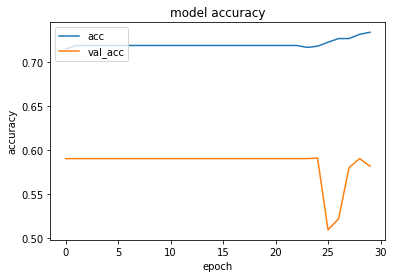

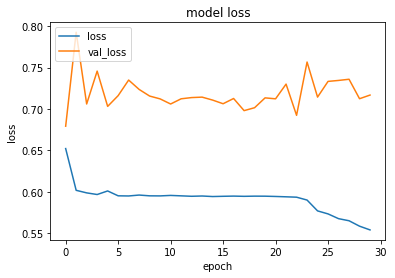

In [27]:
# run CNN model
model, val_acc = evaluate_model(newNPX, newNPX_test, npY, npY_test) 

['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 28s 7ms/step - loss: 1.4719 - acc: 0.7117 - val_loss: 1.2897 - val_acc: 0.7130

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6099 - acc: 0.7194 - val_loss: 0.6788 - val_acc: 0.7130

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5999 - acc: 0.7194 - val_loss: 0.6080 - val_acc: 0.7130

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5984 - acc: 0.7194 - val_loss: 0.6047 - val_acc: 0.7130

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [===========================

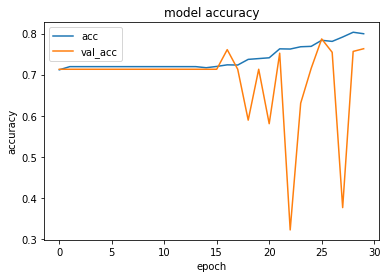

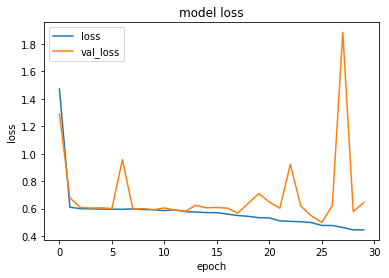

K-Fold has ran  1  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6646 - acc: 0.7129 - val_loss: 0.9337 - val_acc: 0.7348

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6100 - acc: 0.7170 - val_loss: 0.6371 - val_acc: 0.7348

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6040 - acc: 0.7170 - val_loss: 0.5882 - val_acc: 0.73483s - loss: 0.6

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5988 - acc: 0.7170 - val_loss: 0.5841 - val_acc: 0.7348

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/

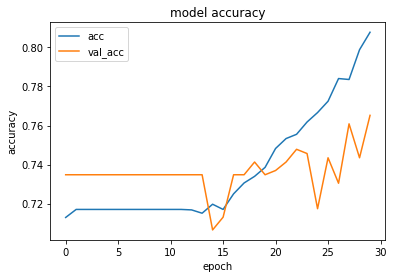

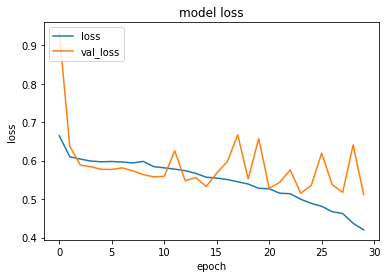

K-Fold has ran  2  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6355 - acc: 0.7146 - val_loss: 0.6124 - val_acc: 0.7043

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6013 - acc: 0.7204 - val_loss: 0.6083 - val_acc: 0.7043

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5967 - acc: 0.7204 - val_loss: 0.6131 - val_acc: 0.7043

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5949 - acc: 0.7204 - val_loss: 0.6076 - val_acc: 0.7043

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [

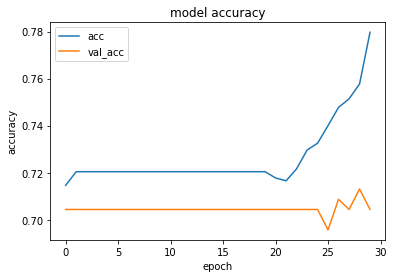

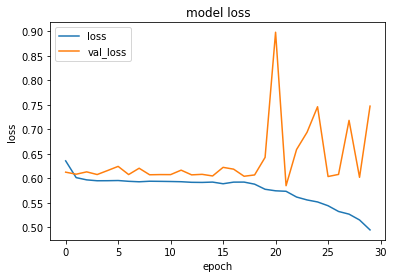

K-Fold has ran  3  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6366 - acc: 0.7177 - val_loss: 0.6207 - val_acc: 0.6935

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6020 - acc: 0.7216 - val_loss: 0.6235 - val_acc: 0.6935

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5975 - acc: 0.7216 - val_loss: 0.8383 - val_acc: 0.6935

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5977 - acc: 0.7216 - val_loss: 0.6173 - val_acc: 0.6935

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [

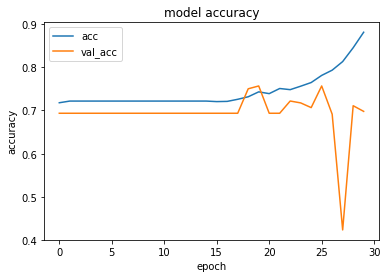

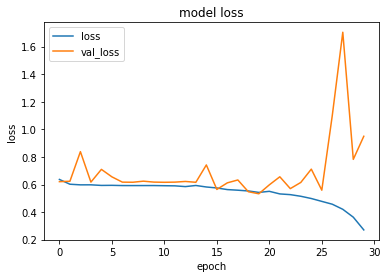

K-Fold has ran  4  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6230 - acc: 0.7158 - val_loss: 0.5922 - val_acc: 0.7283

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6020 - acc: 0.7177 - val_loss: 0.6125 - val_acc: 0.7283

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6003 - acc: 0.7177 - val_loss: 0.5880 - val_acc: 0.7283

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5973 - acc: 0.7177 - val_loss: 0.5917 - val_acc: 0.7283

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [

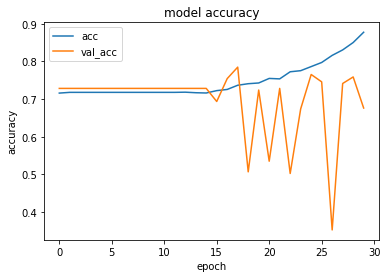

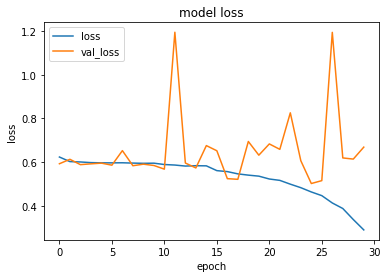

K-Fold has ran  5  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 28s 7ms/step - loss: 0.6248 - acc: 0.7136 - val_loss: 0.7384 - val_acc: 0.7000

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6026 - acc: 0.7209 - val_loss: 0.6293 - val_acc: 0.7000

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5957 - acc: 0.7209 - val_loss: 1.2972 - val_acc: 0.7000

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5996 - acc: 0.7209 - val_loss: 0.6338 - val_acc: 0.7000

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [

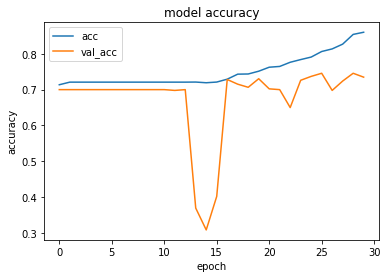

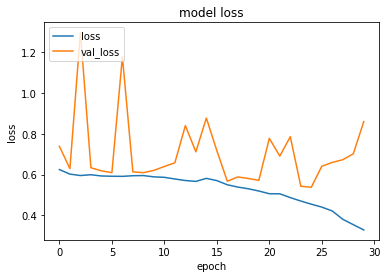

K-Fold has ran  6  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 28s 7ms/step - loss: 0.6176 - acc: 0.7127 - val_loss: 0.5863 - val_acc: 0.7304

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6054 - acc: 0.7175 - val_loss: 0.5904 - val_acc: 0.7304

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5980 - acc: 0.7175 - val_loss: 0.5933 - val_acc: 0.7304

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5956 - acc: 0.7175 - val_loss: 0.5809 - val_acc: 0.7304

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [

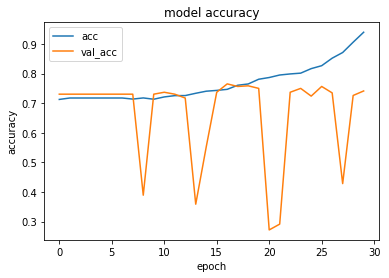

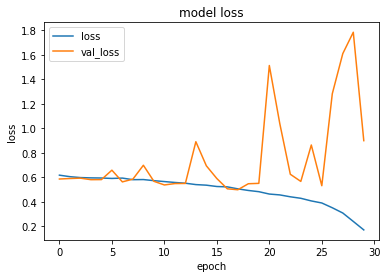

K-Fold has ran  7  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 28s 7ms/step - loss: 0.6366 - acc: 0.7185 - val_loss: 0.6247 - val_acc: 0.6870

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5978 - acc: 0.7223 - val_loss: 0.9412 - val_acc: 0.6870

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5960 - acc: 0.7223 - val_loss: 0.6227 - val_acc: 0.6870

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5936 - acc: 0.7223 - val_loss: 0.6219 - val_acc: 0.6870

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [

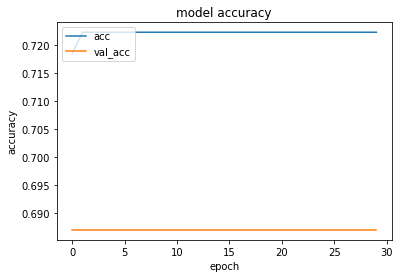

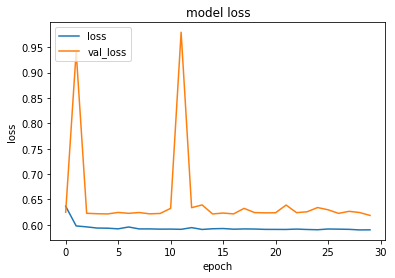

K-Fold has ran  8  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 28s 7ms/step - loss: 0.6313 - acc: 0.7107 - val_loss: 0.6296 - val_acc: 0.7413

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6037 - acc: 0.7163 - val_loss: 0.6034 - val_acc: 0.7413

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6010 - acc: 0.7163 - val_loss: 0.5872 - val_acc: 0.7413

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.5996 - acc: 0.7163 - val_loss: 0.5838 - val_acc: 0.7413

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [

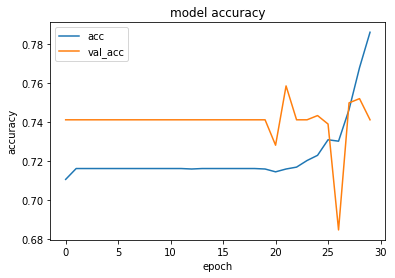

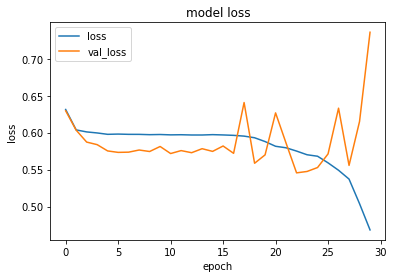

K-Fold has ran  9  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 28s 7ms/step - loss: 2.2037 - acc: 0.7032 - val_loss: 0.7500 - val_acc: 0.7196

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6116 - acc: 0.7187 - val_loss: 2.9375 - val_acc: 0.7196

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6174 - acc: 0.7187 - val_loss: 0.6003 - val_acc: 0.7196

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 27s 7ms/step - loss: 0.6010 - acc: 0.7187 - val_loss: 0.6030 - val_acc: 0.7196

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [

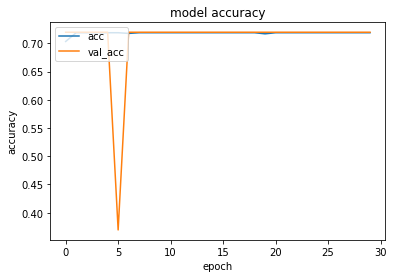

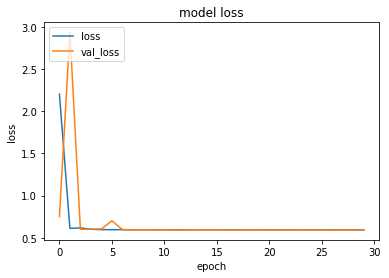

K-Fold has ran  10  time(s)

Model Accuracy after all K-Fold:  0.7230434781053792


In [28]:
# k-fold cross validation, k = n_folds

n_folds = 10
count = 0
cv_scores, model_history = list(), list()
for _ in range(n_folds):
    # split data
    X_train, X_val, y_train, y_val = train_test_split(newNPX, npY, test_size=0.10, random_state = np.random.randint(1,1000, 1)[0])
    # evaluate model
    model, test_acc = evaluate_model(X_train, X_val, y_train, y_val)
    count += 1
    cv_scores.append(test_acc)
    model_history.append(model)
    print('K-Fold has ran ', count, ' time(s)')
    
print('\nModel Accuracy after all K-Fold: ', (np.mean(cv_scores)))

In [29]:
result = model.predict(newNPX_v)
for each in result:
    print(each)

[0.93056047]
[0.91874313]
[0.93263346]
[0.9420553]
[0.913744]
[0.92804635]
[0.96947]
[0.95470136]
[0.90248656]
[0.94714075]
[0.93494815]
[0.9397047]
[0.92287934]
[0.8937334]
[0.8884201]
[0.90644234]
[0.9522578]
[0.9305537]
[0.9212312]
[0.9410665]
[0.9154278]
[0.9050593]
[0.8978919]
[0.91163635]
[0.92566514]
[0.90666693]
[0.9236158]
[0.9258367]
[0.9561146]
[0.87558913]
[0.92934144]
[0.9190328]
[0.91069454]
[0.92218924]
[0.94846785]
[0.9324591]
[0.9511837]
[0.90559447]
[0.8967962]
[0.9451006]
[0.92549396]
[0.92373776]
[0.93487495]
[0.93115795]
[0.9557876]
[0.9304354]
[0.937994]
[0.9290727]
[0.9457194]
[0.9140887]
[0.93824697]
[0.90502155]
[0.9384511]
[0.9378021]
[0.9004153]
[0.93223673]
[0.94979036]
[0.93490934]
[0.8936241]
[0.92046785]
[0.93110573]
[0.9237161]
[0.92970407]
[0.36523217]
[0.5474122]
[0.95780396]
[0.94394124]
[0.9396604]
[0.9424349]
[0.9396657]
[0.9272634]
[0.934301]
[0.934858]
[0.9439944]
[0.9298669]
[0.9441328]
[0.94001293]
[0.94400823]
[0.9480833]
[0.9470732]
[0.9502247

[0.88114744]
[0.8532588]
[0.8156103]
[0.8644241]
[0.8185729]
[0.84635204]
[0.8829211]
[0.86707723]
[0.8170189]
[0.82779264]
[0.8194664]
[0.86950594]
[0.85665023]
[0.8640461]
[0.84425116]
[0.8756634]
[0.84093714]
[0.8322425]
[0.91715664]
[0.83655334]
[0.87553895]
[0.8129436]
[0.8426938]
[0.8288113]
[0.864337]
[0.8205826]
[0.89000344]
[0.8865372]
[0.83361375]
[0.87593114]
[0.8636224]
[0.8554772]
[0.80407035]
[0.85398245]
[0.81394553]
[0.8492772]
[0.8532407]
[0.87687886]
[0.8674418]
[0.8325631]
[0.8768126]
[0.8398901]
[0.85865057]
[0.8071614]
[0.82248664]
[0.82788765]
[0.8752682]
[0.85344505]
[0.84808874]
[0.8548943]
[0.87439454]
[0.817402]
[0.83458596]
[0.90787965]
[0.8823062]
[0.8624402]
[0.8368335]
[0.8546004]
[0.88889885]
[0.9127295]
[0.8830229]
[0.8748841]
[0.36593163]
[0.7972511]
[0.8846991]
[0.9095391]
[0.8873488]
[0.9000429]
[0.8439206]
[0.881163]
[0.82875717]
[0.8893435]
[0.8889145]
[0.8533398]
[0.89465904]
[0.8745198]
[0.87597454]
[0.83775246]
[0.8927772]
[0.851001]
[0.85510087]

In [30]:
np.mean(cv_scores)

0.7230434781053792